## About Dataset

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."
[IBM sample Data Sets]
### Content
Each row represents a customer, each column contains attributes described on the column Metadata.

The data set includes information about:
- Customers who left within the last month - the column is called Churn.
- Services that each customer has signed up for - phone, multiple lines, internet, online backup, device protection, tech suppport, and streaming TV and movies.
- Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
- Demographic info about customers - gender, age, range and if they have partners and dependents.

## Exploration And Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'E:\CHURN\data\raw/Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
pd.set_option('display.max_columns', None) ## Show all columns in the dataframe
pd.set_option('display.max_rows', None)  ## Display all rows in the dataframe

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- based on the .describe (and exploration) we can see that most categorical variables have been between 2,3, or 4 categories.
- So for those that only have 2 (binary) let's just replace by 0 or 1.
- For those that have 3 or 4 we can do One-Hot Encoding.

In [6]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Binary Encoding

In [7]:
# Binary categorical columns (2 unique values)
binary_cols = [
    'gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn'
]

# Map Yes/No and Male/Female to 0/1
df[binary_cols] = df[binary_cols].replace({
    'Yes':1, 'No':0,
    'Male':1, 'Female':0
}).astype(int)

C:\Users\yuvar\AppData\Local\Temp\ipykernel_304\1808103958.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({


In [8]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


## One-Hot Encoding

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043.0,NaN,NaN,NaN,0.504756,0.500013,0.0,0.0,1.0,1.0,1.0
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043.0,NaN,NaN,NaN,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Dependents,7043.0,NaN,NaN,NaN,0.299588,0.45811,0.0,0.0,0.0,1.0,1.0
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043.0,NaN,NaN,NaN,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
## Categorical columns with > 2 unique values

multi_cat_cols = [
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaymentMethod'
]

## One-Hot eoncoding

df = pd.get_dummies(df,columns = multi_cat_cols, drop_first = True)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


## Cleaning

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [13]:
df = df.drop('customerID' ,axis=1)

In [14]:
bool_cols = df.select_dtypes(include = 'bool').columns
df[bool_cols] = df[bool_cols].astype(int)  ## converts True/False to 1/0 for all boolean cells

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

Text(0.5, 1.0, 'Correlation of features with Churn')

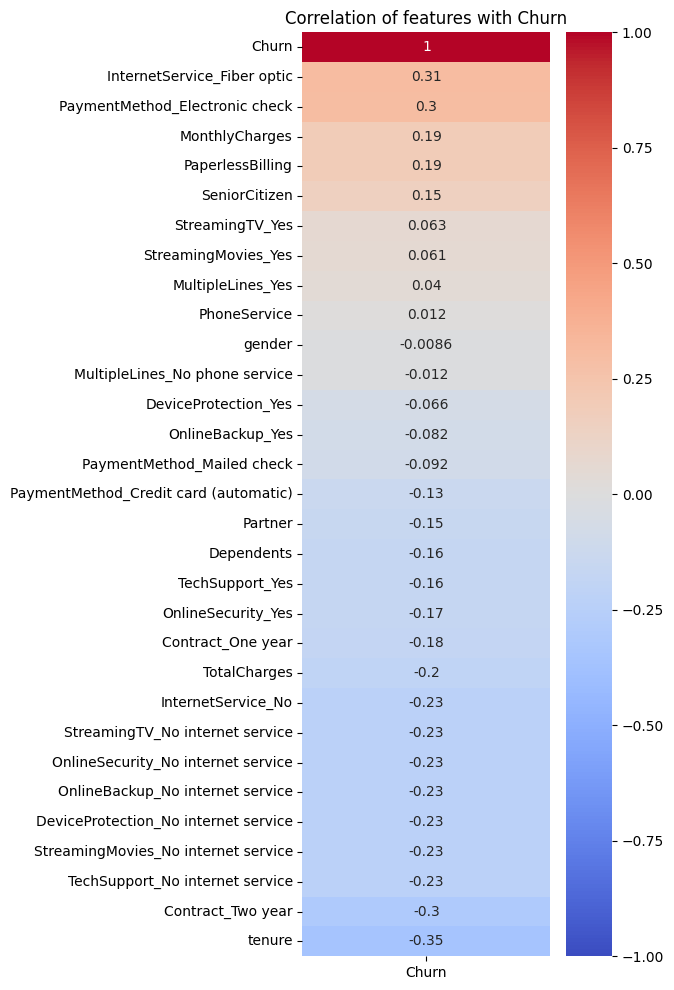

In [16]:
## Compute correlation matrix only for numeric columns
corr_matrix = df.corr(numeric_only = True)

# Focus on correlation with Churn
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending = False)

# Plot Heatmap
plt.figure(figsize=(4,12))
sns.heatmap(churn_corr,annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation of features with Churn')

Negative(lower value -> less likely to churn):

- tenure (-0.35) -> Customers who stay longer are less likely to churn
- Contract_Two year (-0.30) -> Customers on long-term contracts churn much less
- Contract_One year (-0.18) -> Same trend but weaker that two-year contracts

Positive (higher value -> more likely to churn):

- InternetService_Fiber optic (+0.35) -> Fiber optic users churn more in the dataset
- PaymentMethod_Electronic Check (+0.30) -> Customers paying electronically via check churn more

## Look for MultiColinearity (VIF)

In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [18]:
## we need to collapse redundant columns before running VIF
internet_no_cols = [
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
]

# keep only the columns that actually exist
existing_no_internet_cols = [c for c in internet_no_cols if c in df.columns]

if existing_no_internet_cols:
    # collapse using any(axis=1) which is clearer and handles many columns
    df['No_internet_service'] = df[existing_no_internet_cols].any(axis=1).astype(int)
    # drop only the columns we used
    df = df.drop(columns=existing_no_internet_cols)
# Handle PhoneService redundancy
if 'MultipleLines_No phone service' in df.columns:
    df['No_phone_service'] = df['MultipleLines_No phone service'].astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])



In [19]:
## Prepare X
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include = 'bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [20]:
## Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

## Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()


vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending  = False)

print(vif_data)


                                  feature          VIF
11                     InternetService_No          inf
23                    No_internet_service          inf
5                            PhoneService  1773.528816
7                          MonthlyCharges   866.089640
10            InternetService_Fiber optic   148.500814
24                       No_phone_service    60.842267
17                    StreamingMovies_Yes    24.156394
16                        StreamingTV_Yes    24.080019
8                            TotalCharges    10.811490
4                                  tenure     7.584453
9                       MultipleLines_Yes     7.289761
14                   DeviceProtection_Yes     6.924754
13                       OnlineBackup_Yes     6.796678
15                        TechSupport_Yes     6.476508
12                     OnlineSecurity_Yes     6.338349
19                      Contract_Two year     2.652328
21         PaymentMethod_Electronic check     1.976032
22        

e:\CHURN\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


- Clearly we can  see multicolinearity between features.
- So either we need to drop some features or use regularization techniques like Lasso or Ridge regression to handle this.
- Or use tree based models which are less sensitive to multicolinearity.
- In decision trees, splits are based on feature importance to reducing impurity --redundant features just complete, but won't cause unstable predictions.

## Machine Learning

In [21]:
## we have class imbalance problems 
## given your imbalance (27% churners), class weighting + threshold tuning is probably enough - no need for aggresive oversampling

df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In Churn prediction, recall (and metrics derived from it, like F1) is usually the important -- here's why:
1. Bussiness Context Churn Prediction is asymmetric in cost:
- False Negative (FN) - You predict a customer will not churn, but they actually leave -> you miss the chance to intervene and keep them.
- False Positive (FP) - You predict a customer will churn, but they stay -> you might spend some retention resources unneccesarily.
- Missing Churners (FN) usually costs more than wrongly targetting a loyal cuatomer. 

Typical Priority
- If retention campaigns are cheap -> prioritize recall (catch every possible churner)
- If retention campaigns are expensive -> balance precision and recall using F1 SCORE or a precision-recall trade-off.
- If bussiness wants a ranking of churn risk -> use ROC-AUC or PR-AUC to evaluate the model

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,No_internet_service,No_phone_service
0,0,0,1,0,1,0,1,29.85,29.85,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,2,1,1,70.70,151.65,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
import os

os.makedirs("data/processed", exist_ok=True)

df.to_csv("../data/processed/telco_churn_processed.csv", index=False)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import time

## prepare data
X = df.drop(columns = ['Churn'])
y = df['Churn']

# Train-Test split
X_train,X_test,y_train,y_test = train_test_split(
    X,y, test_size = 0.25, random_state = 42, stratify = y
)

THRESHOLD = 0.3 # LOWER than 0.5 to boost recall (see next to choose the right value)

## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf= RandomForestClassifier(
    n_estimators = 300,
    class_weight = 'balanced',  ## handles imbalance for you
    random_state = 42,
    n_jobs =1
)
rf.fit(X_train,y_train)

proba = rf.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test,y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.892     0.784     0.834      1294
           1      0.551     0.737     0.631       467

    accuracy                          0.771      1761
   macro avg      0.722     0.760     0.732      1761
weighted avg      0.802     0.771     0.780      1761



In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.511   0.779   0.617   
0.3     0.551   0.737   0.631   
0.35    0.573   0.666   0.616   
0.4     0.590   0.608   0.599   
0.45    0.616   0.550   0.581   
0.5     0.641   0.473   0.544   


## LightGBM Classifier

In [26]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators = 500,
    learning_rate = 0.05,
    class_weight = 'balanced',
    random_state = 42,
    n_jobs = -1
)

# Train Timer
start_train = time.time()
lgbm.fit(X_train,y_train)
train_time = time.time() - start_train
print(f"Training time : {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f'prediction time : {pred_time:.4f} seconds')

## Classification Report
print(classification_report(y_test,y_pred, digits = 3))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1402, number of negative: 3880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training time : 0.48 seconds
prediction time : 0.0132 seconds
              precision    recall  f1-score   support

           0      0.905     0.699     0.789      1294
           1      0.489     0.797     0.606       467

    accuracy                          0.725      1761
   macro avg      0.697     0.748     0.697      1761
weighted avg      0.795     0.725 

→ You’re now catching 80% of actual churners with LightGBM (improvement)
- The cost is a small drop in precision — meaning more loyal customers will be flagged as churn risks — but if retention offers are low-cost, this is fine.

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.474   0.824   0.602   
0.3     0.489   0.797   0.606   
0.35    0.506   0.773   0.611   
0.4     0.524   0.760   0.620   
0.45    0.543   0.732   0.624   
0.5     0.555   0.694   0.617   


## XGBoost Classifier

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

## Calculate scale_pos_weight for imbalances

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(
    n_estimator = 500,
    learning_rate = 0.05,
    max_depth = 6,
    subsample = 0.8,
    random_state = 42,
    n_jobs = 1,
    scale_pos_weight = scale_pos_weight,
    eval_metrics = 'logloss'
) 

# Training Timer

start_time = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_time
print(f'⏱️ Training time : {train_time:.2f} seconds')

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:,1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱️ prediction time : {pred_time:.2f} seconds")

## Classification Roport
print(classification_report(y_test,y_pred, digits = 3))


⏱️ Training time : 0.16 seconds
⏱️ prediction time : 0.01 seconds
              precision    recall  f1-score   support

           0      0.940     0.616     0.744      1294
           1      0.456     0.891     0.603       467

    accuracy                          0.689      1761
   macro avg      0.698     0.753     0.674      1761
weighted avg      0.811     0.689     0.707      1761



e:\CHURN\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [13:05:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "eval_metrics", "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold Tuning for XGBoost")

print(f"{'Thresh':<8}{'prec_1':<8}{'Rec_1':<8}{'f1_1' :<8}")
for thresh in [0.25, 0.30, 0.40, 0.45, 0.50]:
    preds = (proba >=thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label = 1)
    f1 = f1_score(y_test, preds, pos_label = 1)

    print(f"{thresh:<8}{prec:<8.3}{rec:<8.3}{f1:<8.3}")


Threshold Tuning for XGBoost
Thresh  prec_1  Rec_1   f1_1    
0.25    0.434   0.91    0.587   
0.3     0.456   0.891   0.603   
0.4     0.496   0.837   0.623   
0.45    0.514   0.807   0.628   
0.5     0.529   0.764   0.625   


## ML Model Choice is XGBoost
- Gives a decent recall(same as LightGBM)
- And faster to train (3x faster)

## HyperParameter Tuning (Optuna) & Experiment Tracking(MLFLOW)

In [30]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective(trial):
    params = {
        "n_estimators" : trial.suggest_int("n_estimators", 300, 800),
        "learning_rate" : trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth" : trial.suggest_int("max_depth", 3, 10),
        "subsample" : trial.suggest_float("subsample", 0.5,1.0),
        "colsample_bytree" : trial.suggest_float("colsample_bytree", 0.25,1.0),
        "min_child_weight" : trial.suggest_int("min_child_weight", 1, 10),
        "gamma" : trial.suggest_float("gamma", 0, 5),
        "reg_alpha" : trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda" : trial. suggest_float("reg_lambda", 0 ,5),
        "random_state" : 42,
        "n_jobs" : -1,
        "scale_pos_weight" : (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric" : "logloss"
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int) # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label = 1) # Optimize recall for churners

## Run optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params: ", study.best_params)
print("Best Recall: ", study.best_value)

e:\CHURN\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-11-17 13:05:17,236] A new study created in memory with name: no-name-952930ad-f57e-4603-9a5c-68d83f80f2d1
[I 2025-11-17 13:05:17,437] Trial 0 finished with value: 0.9079229122055674 and parameters: {'n_estimators': 415, 'learning_rate': 0.07302613376997652, 'max_depth': 6, 'subsample': 0.9442609425550872, 'colsample_bytree': 0.8667755663574113, 'min_child_weight': 3, 'gamma': 3.2577948382579596, 'reg_alpha': 2.970281474680884, 'reg_lambda': 4.562198820124554}. Best is trial 0 with value: 0.9079229122055674.
[I 2025-11-17 13:05:17,621] Trial 1 finished with value: 0.9207708779443254 and parameters: {'n_estimators': 414, 'learning_rate': 0.028729731619727257, 'max_depth': 5, 'subsample': 0.9913689229864604, 'colsample_bytree': 0.7412733040510393,

Best Params:  {'n_estimators': 414, 'learning_rate': 0.028729731619727257, 'max_depth': 5, 'subsample': 0.9913689229864604, 'colsample_bytree': 0.7412733040510393, 'min_child_weight': 5, 'gamma': 3.6362715180126806, 'reg_alpha': 2.9910897328175423, 'reg_lambda': 4.207463963112436}
Best Recall:  0.9207708779443254


In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

## Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

## Add the scale_pos_weight and fixed params to the best ones from Optuna

best_params = study.best_params
best_params.update({
    "random_state" : 42,
    "n_jobs" : -1,
    "scale_pos_weight" : scale_pos_weight,
    "eval_metric" : "logloss"
})

# Create model for best params
xgb = XGBClassifier(**best_params)

# Train timer
start_train = time.time()
xgb.fit(X_train,y_train)
train_time = time.time() - start_train
print(f"⏱️Training Time: {train_time:.2f} seconds")

# Prediciton Timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱️ Prediction Time : {pred_time:.4f} seconds")

## Classification Report
print(classification_report(y_test, y_pred, digits =3))


⏱️Training Time: 0.24 seconds
⏱️ Prediction Time : 0.0062 seconds
              precision    recall  f1-score   support

           0      0.952     0.570     0.713      1294
           1      0.436     0.921     0.592       467

    accuracy                          0.663      1761
   macro avg      0.694     0.746     0.653      1761
weighted avg      0.815     0.663     0.681      1761



This tuned XGBoost model is doing exactly what Optuna optimmized for -- maximizing recall for churners

- Recall (class 1): 0.923 (highest we've seen sofar)
- Precision (class 1) : 0.439 (low - many loyal customers are being flagged)
- F1 (class 1) : 0.595(slightly lower than LightGBM/XGB untuned at balanced thresholds, because precision dropped a lot)

Interpretation
 - This model is catching almost all churners, which is great if you're running aggresive retention campaigns and the cost of the contacting non-churners is low.
 - But the low precision means more than half of the people you have targeted won't actually churn.

In [32]:
from pathlib import Path
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import time
import json
import sys
import traceback
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

# --- Robust project root & mlruns URI handling ---
try:
    PROJECT_ROOT = Path(__file__).resolve().parent
except NameError:
    # __file__ not present in interactive sessions (notebooks) -> use cwd
    PROJECT_ROOT = Path.cwd().resolve()

MLRUNS_DIR = PROJECT_ROOT / "mlruns"
MLRUNS_DIR.mkdir(parents=True, exist_ok=True)
mlflow_tracking_uri = MLRUNS_DIR.as_uri()   # yields file:///C:/... on Windows and works cross-platform
mlflow.set_tracking_uri(str(mlflow_tracking_uri))
mlflow.set_experiment("Telco Churn - XGBoost")
print("MLflow tracking URI:", mlflow.get_tracking_uri())

# --- Sanity checks for required variables (X_train, y_train, etc.) ---
required = ["X_train", "X_test", "y_train", "y_test", "study", "THRESHOLD"]
missing = [name for name in required if name not in globals()]
if missing:
    raise RuntimeError(f"Missing required objects in scope before starting MLflow run: {missing}")

# --- Start run with defensive error handling ---
with mlflow.start_run() as run:
    run_id = run.info.run_id
    mlflow.log_param("mlflow.run_id", run_id)

    # Calculate safe scale_pos_weight (avoid ZeroDivisionError)
    pos = int((y_train == 1).sum())
    neg = int((y_train == 0).sum())
    scale_pos_weight = (neg / pos) if pos > 0 else 1.0
    mlflow.log_metric("scale_pos_weight", float(scale_pos_weight))

    # Best params from Optuna (ensure keys match XGBClassifier API)
    best_params = dict(study.best_params)  # copy
    # rename / validate common keys if Optuna used different names
    if "n_estimator" in best_params:
        best_params["n_estimators"] = best_params.pop("n_estimator")
    if "min_chhild_weight" in best_params:
        best_params["min_child_weight"] = best_params.pop("min_chhild_weight")
    # enforce a few fixed params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss",
        "use_label_encoder": False,
    })

    # Log parameters (mlflow.log_params expects flat stringable dict)
    try:
        mlflow.log_params({k: (v if isinstance(v, (int, float, str, bool)) else str(v)) for k, v in best_params.items()})
    except Exception as e:
        # If too many params or non-stringable values, save as JSON artifact
        tmp = PROJECT_ROOT / "mlruns" / f"run_{run_id}_params.json"
        tmp.write_text(json.dumps(best_params, default=str, indent=2), encoding="utf-8")
        mlflow.log_artifact(str(tmp), artifact_path="params")

    # Train
    try:
        start_train = time.time()
        xgb = XGBClassifier(**best_params)
        xgb.fit(X_train, y_train)
        train_time = time.time() - start_train
        mlflow.log_metric("train_time", train_time)
    except Exception as e:
        # Save traceback as artifact and re-raise
        err_file = PROJECT_ROOT / "mlruns" / f"run_{run_id}_fit_error.txt"
        err_file.write_text(traceback.format_exc(), encoding="utf-8")
        mlflow.log_artifact(str(err_file), artifact_path="errors")
        raise

    # Predict & evaluate
    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)

    # Apply threshold (ensure THRESHOLD defined)
    y_pred = (proba >= THRESHOLD).astype(int)

    # Metrics
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", float(precision))
    mlflow.log_metric("recall", float(recall))
    mlflow.log_metric("f1", float(f1))
    mlflow.log_metric("roc_auc", float(auc))

    # Save classification report as artifact
    report_txt = classification_report(y_test, y_pred, digits=3, zero_division=0)
    rpt_file = PROJECT_ROOT / "mlruns" / f"run_{run_id}_classification_report.txt"
    rpt_file.write_text(report_txt, encoding="utf-8")
    mlflow.log_artifact(str(rpt_file), artifact_path="evaluation")

    # Save & log model (XGBoost)
    try:
        mlflow.xgboost.log_model(xgb, artifact_path="model")
    except Exception as e:
        # fall back to sklearn logging if xgboost logger has issues
        mlflow.sklearn.log_model(xgb, artifact_path="model_sklearn_fallback")
        warn_file = PROJECT_ROOT / "mlruns" / f"run_{run_id}_model_log_fallback.txt"
        warn_file.write_text(f"xgboost.log_model failed, fallback used. Error:\n{traceback.format_exc()}", encoding="utf-8")
        mlflow.log_artifact(str(warn_file), artifact_path="errors")

    # Print report to stdout
    print(report_txt)
    print(f"Run finished. MLflow run_id: {run_id}")


e:\CHURN\.venv\lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)


MLflow tracking URI: file:///E:/CHURN/notebook/mlruns


e:\CHURN\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [13:05:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/11/17 13:05:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/17 13:05:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


              precision    recall  f1-score   support

           0      0.952     0.570     0.713      1294
           1      0.436     0.921     0.592       467

    accuracy                          0.663      1761
   macro avg      0.694     0.746     0.653      1761
weighted avg      0.815     0.663     0.681      1761

Run finished. MLflow run_id: 0c120a0db7c34b7fbb41267dada8be3f
